In [ ]:
# GRIP- April2022
# The Spark Foundation-Data science & Business Analytics Intern
# Aauthor - Sumyuktha.k
# Email: atturu05@gmail.com
# Task 1 :Prediction Using supervised ML


In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Reading the data
df_study = pd.read_csv("E:\sparktask\study.csv")
df_study

,hours,scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# studying the shape(rows and columns)
df_study.shape

(25, 2)

In [4]:
# Getting insites of the data
df_study.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hours   25 non-null     float64
 1   scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# Getting the info about the outliers
df_study.describe()

,hours,scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
#checking for null values
df_study.isnull().sum()

hours     0
scores    0
dtype: int64

###  Data Visualization using seaborn

In [7]:
import seaborn as sns
sns.set()
sns.set(style ='darkgrid')

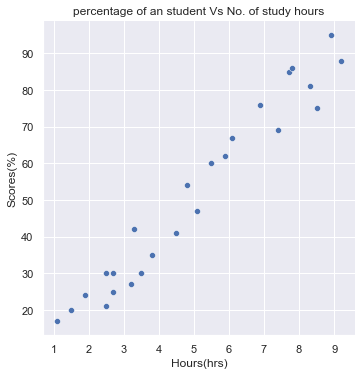

In [8]:
p=sns.relplot(x ='hours', y = 'scores' , data=df_study, kind ="scatter").set( title= 'percentage of an student Vs No. of study hours');
p.set(xlabel = "Hours(hrs)" , ylabel = "Scores(%)")

In [9]:
# Import libraries for Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [10]:
#Lets split the dataset
x=df_study.iloc[:,:-1].values
y=df_study.iloc[:,1].values

In [11]:
# Training the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=50)

In [12]:
# we can now instantiate a Linear Regression Object
reg = LinearRegression()

In [13]:
# Trying to use regression model
reg.fit(x_train,y_train)
print("Training data is completed")

Training data is completed


In [14]:
# trying to print coefficient and intercept
print(reg.coef_)
print(reg.intercept_)

[9.52160608]
3.7843079418921803


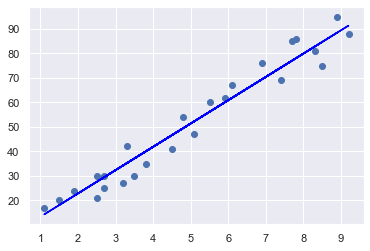

In [15]:
#plotting Regression line
line = reg.coef_*x+reg.intercept_

plt.scatter(x,y)
plt.plot(x, line , color = 'blue');
plt.show()

## # Making Predictions

In [16]:
# Testing Data
print(x_test)
# Model Prediction
Y_predict = reg.predict(x_test)

[[8.9]
 [2.7]
 [6.9]
 [3.8]
 [1.1]
 [4.5]
 [8.3]
 [2.7]]


In [17]:
# Comparing Actual Values with predicted values 
df=pd.DataFrame({'Actual': y_test , 'Predicted' : Y_predict})
df

,Actual,Predicted
0,95,88.526602
1,30,29.492644
2,76,69.483390
3,35,39.966411
4,17,14.258075
5,41,46.631535
6,81,82.813638
7,25,29.492644


In [18]:
# Testing the model with sparks foundation task value
hours=9.25
task_value1 = np.array([hours])
task_value = task_value1.reshape(-1, 1)
task_value_predict = reg.predict(task_value)
print("no of hours" , hours)
print("predicted score", task_value_predict)

no of hours 9.25
predicted score [91.85916415]


### Evaluating the model using statsmodel

In [19]:
 # Importing libraries
import statsmodels.api as sm

In [20]:
x_endog = sm.add_constant(x_test)
res = sm.OLS(y_test,x_endog)
res.fit()

In [21]:
res.fit().summary()

C:\Users\admin\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     244.7
Date:                Thu, 14 Apr 2022   Prob (F-statistic):           4.32e-06
Time:                        05:18:48   Log-Likelihood:                -22.956
No. Observations:                   8   AIC:                             49.91
Df Residuals:                       6   BIC:                             50.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3936      3.618      0.109      0.917      -8.459       9.246
x1            10.2018      0.652     15.643      0.000       8.606      11.798
==============================================================================
Omnibus:                        4.718   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.095   Jarque-Bera (JB):                1.057
Skew:                           0.078   Prob(JB):                        0.589
Kurtosis:                       1.226   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Successfully done with Task-1 using Supervised ML method and was able to predict and evaluate the model's performance using various parameters. 